In [88]:
# Importando bibliotecas
import pandas as pd
import numpy as np

from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [89]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/Iris.csv"
data_treino = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [90]:
treinamento_classification = data_treino['class']
data_treino.drop(["class"], axis=1, inplace=True)

In [91]:
data_treino

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
treinamento_classification

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [93]:
x_train, x_test, y_train, y_test = train_test_split(data_treino, treinamento_classification, test_size=0.20, random_state=0)

In [94]:
tree_classifier = DecisionTreeClassifier(criterion="entropy")
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

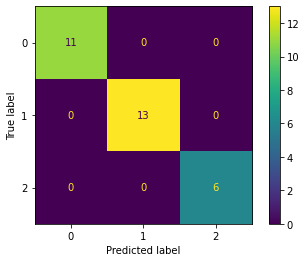

In [95]:
conf_matrix = confusion_matrix(y_test, tree_classifier.predict(x_test))
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot(values_format="d")
plt.show()

In [96]:
print("Accuracy score = ", accuracy_score(y_test, tree_classifier.predict(x_test)))
print(classification_report(y_test, tree_classifier.predict(x_test)))

Accuracy score =  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [97]:
rforest = RandomForestClassifier(max_features=2, criterion='gini', random_state=0)
rforest.fit(x_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

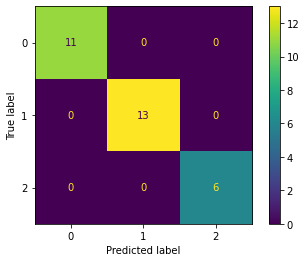

In [98]:
conf_matrix = confusion_matrix(y_test, rforest.predict(x_test))
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot(values_format="d")
plt.show()

In [99]:
print('Random Forest')
print("Accuracy score = ", accuracy_score(y_test, rforest.predict(x_test)))
print(classification_report(y_test, rforest.predict(x_test)))

Random Forest
Accuracy score =  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [106]:
scores = cross_val_score(rforest, data_treino, treinamento_classification, cv=10)

print('Acurácia nos k-folds:', scores)
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(scores), np.std(scores)))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Acurácia nos k-folds: [0.91666667 0.91666667 0.83333333 1.         1.         1.
 0.91666667 0.91666667 0.91666667 0.91666667]
Média: 0.93 | Desvio: 0.05
Accuracy: 0.93 (+/- 0.10)


In [107]:
scores = cross_val_score(tree_classifier, data_treino, treinamento_classification, cv=10)

print('Acurácia nos k-folds:', scores)
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(scores), np.std(scores)))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Acurácia nos k-folds: [0.91666667 0.91666667 0.91666667 1.         1.         0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667]
Média: 0.93 | Desvio: 0.033
Accuracy: 0.93 (+/- 0.07)
